Các thuật ngữ trong bài

* Hồi qui: Regression
* Tích cực: Positive
* Tiêu cực: Negative
* Nhân tử Lagrange: Lagrange multiplier
* Phương pháp hạ dốc: gradient descent
* Hệ số học tập: learning rate

# 3. Bài toán phân loại

**Một số bài toán phân loại phổ biến**

Trong lớp các mô hình học có giám sát (_supervised learning_) thì có hai bài toán chính là bài toán dự báo (đối với biến mục tiêu liên tục) và bài toán phân loại (đối với biến mục tiêu là rời rạc). Chúng ta đã được tìm hiểu về [bài toán dự báo và mô hình hồi qui tuyến tính](https://phamdinhkhanh.github.io/deepai-book/ch_ml/index_prediction.html) ở bài trước. Trong bài này chúng ta sẽ tiếp tục tìm hiểu về bài toán phân loại và mô hình hồi qui logistic.

Bài toán phân loại là lớp bài toán được ứng dụng phổ biến nhất trong machine learning. Có rất nhiều các tác vụ mà chúng ta có thể kể đến liên quan tới lớp bài toán phân loại:

* **Phân loại nợ xấu trong ngân hàng:** Danh mục _banking book_ của ngân hàng luôn tồn tại những rủi ro. Các khoảng vay tiềm ẩn những nguy cơ vỡ nợ nên các ngân hàng cần phải đánh giá rủi ro đối với khách hàng của mình thông qua các mô hình phân loại nợ xấu để ra quyết định có _cho vay hay không_ và vay với _hạn mức, kỳ hạn, lãi suất_ là bao nhiêu? Sự khác biệt về sức khoẻ tín dụng giữa các ngân hàng được đánh giá trên khả năng kiểm soát nợ xấu. Để tạo ra một hệ thống quản trị rủi ro hiệu quả thì bên cạnh những biện pháp về phòng ngừa và tuân thủ, ngân hàng cần sử dụng các công cụ mô hình để lượng hoá rủi ro khách hàng.

* **Phát hiện đầu cơ và gian lận trong thương mại điện tử (viết tắt TMĐT)**: Đầu cơ và gian lận là hiện tượng phổ biến trong lĩnh vực TMĐT. Đầu cơ là việc khách hàng mua vượt quá số lượng cho phép và bán ra thị trường với giá cao hơn nhằm hưởng lợi. Một số hành vi gian lận khác gây hậu quả nghiêm trọng cho sàn TMĐT đó là cửa hàng lợi dụng chính sách thưởng doanh số để nhận hoa hoa hồng, khách hàng gian lận để hưởng khuyến mãi,.... Cả hai hành vi đầu cơ và gian lận gây đều gây thâm dụng vốn cho các sàn TMĐT. Xây dựng được một hệ thống phát hiện gian lận sẽ giúp sàn TMĐT hoạt động hiệu quả, tối ưu hoá được ngồn lực về vốn và mở rộng tập khách hàng để tạo ra những lợi thế cạnh tranh trên thị trường.

* **Phân loại bệnh trong y sinh**: Đây là một trong những lĩnh vực có nhiều tiềm năng phát triển và giúp giải quyết các vấn đề liên quan đến sức khoẻ con người. Trong y sinh một số mô hình phân loại giúp cho chúng ta đưa ra các chuẩn đoán bệnh dựa trên các chỉ số xét nghiệm đầu vào sơ bộ như huyết áp, đường huyết, hồng cầu, bạch cầu, tiểu cầu,.... Bên cạnh đó xử lý ảnh trong y sinh cũng là một lĩnh vực có tính ứng dụng cao. Các mô hình thị giác máy tính có thể đưa ra những khuyến nghị cho bác sĩ về vị trí, kích thước và loại khối u. Bạn đọc quan tâm tới lĩnh vực này có thể tham khảo cuộc thi [VinBigData Chest X-ray Abnormalities Detection
](https://www.kaggle.com/c/vinbigdata-chest-xray-abnormalities-detection).
 
Bên trên là một vài ứng dụng nhỏ để bạn đọc hình dung rõ hơn về tính hữu ích và sự phổ biến của các bài toán phân loại trong học có giám sát? Có thể thấy rằng bài toán phân loại hiện tại đang giải quyết rất nhiều vấn đề mà con người đang phải đối mặt. Đồng thời với vai trò to lớn của mình, nó đã và đang mang lại nhiều thay đổi cho nhân loại. Với sự bùng nổ về thuật toán, năng lực tính toán và sự dồi dào của dữ liệu. Ngày càng có nhiều ứng dụng của mô hình phân loại đạt độ chính xác ở mức con người hay thậm chí là vượt trội và thay thế con người trong nhiều tác vụ khác nhau.

Trong chương này chúng ta sẽ cùng tìm hiểu một mô hình phân loại khá phổ biến trong machine learning. Đó là mô hình hồi qui Logistic trong **phân loại nhị phân** của học có giám sát.

**Thế nào là phân loại nhị phân?**

Phân loại nhị phân là bài toán phân loại có biến mục tiêu gồm hai nhãn $\{0, 1\}$. Trong đó nhãn 1 là tích cực (_postive_) và nhãn 0 là tiêu cực (_negative_). Nhãn _tích cực_ ở đây hàm chứa ý nghĩa xảy ra sự kiện và _tiêu cực_ là sự vắng mặt của sự kiện. Mục tiêu của phân loại nhị phân là dự báo xác suất xảy ra hoặc vắng mặt của sự kiện lần lượt tương ứng với nhãn 1 và 0. Tổng của hai xác suất này bằng 1:

$$P(y=1|\mathbf{x}, \mathbf{w}) + P(y=0|\mathbf{x}, \mathbf{w})=1$$

Trong công thức trên thì $P(y=1|\mathbf{x})$ là xác suất có điều kiện, nó thể hiện xác suất của _tích cực_ tại một quan sát $\mathbf{x}$ ứng với một mô hình cụ thể có trọng số $\mathbf{w}$. Giá trị của xác suất này nằm trong khoảng $[0, 1]$. Chính vì thế trong hồi qui tuyến tính chúng ta sẽ đề xuất một hàm giả thuyết $0 \leq h_{\mathbf{w}}(\mathbf{x}) \leq 1$ để dự báo xác suất. Hàm này là hàm Sigmoid hoặc hàm Logistic mà chúng ta sẽ tìm hiểu ở mục sau.

**Tại sao không phân loại dựa trên hồi qui tuyến tính ?**

Chúng ta thường thắc mắc rằng xác suất là một biến liên tục trong khoảng $[0, 1]$, như vậy mô hình hồi qui tuyến tính hoàn toàn có thể được sử dụng để dự báo xác suất. Nhưng tại sao không sử dụng mô hình hồi qui tuyến tính trong bài toán phân loại?

Có nhiều nguyên nhân khiến cho mô hình hồi qui tuyến tính không hoạt động tốt trên các tác vụ phân loại trong học có giám sát. Đó là:

1. Mô hình hồi qui tuyến tính có thể dự báo các giá trị nằm ngoài khoảng [0, 1]. Do đó nó không phù hợp để biểu diễn một xác suất của một sự kiện. 

Thật vậy: Giả sử chúng ta cần xây dựng một mô hình dự báo nợ xấu cho biến $\mathbf{y}$ (nhãn 0 là bình thường, nhãn 1 là nợ xấu). Các giá trị đầu vào bao gồm hai biến $\mathbf{x}_1$ là giá trị khoản vay, và $\mathbf{x}_2$ là tiền lương như sau:

$\mathbf{x}_1 = [125, 140, 175, 180, 180, 200, 225, 245, 270, 280, 120, 100, 90, 85, 80, 80, 70, 50, 50, 40]$


$\mathbf{x}_2 = [15, 18, 20, 25, 25, 25, 27, 30, 32, 35, 45, 50, 50, 55, 55, 55, 60, 70, 80, 90]$

$\mathbf{y} = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]$

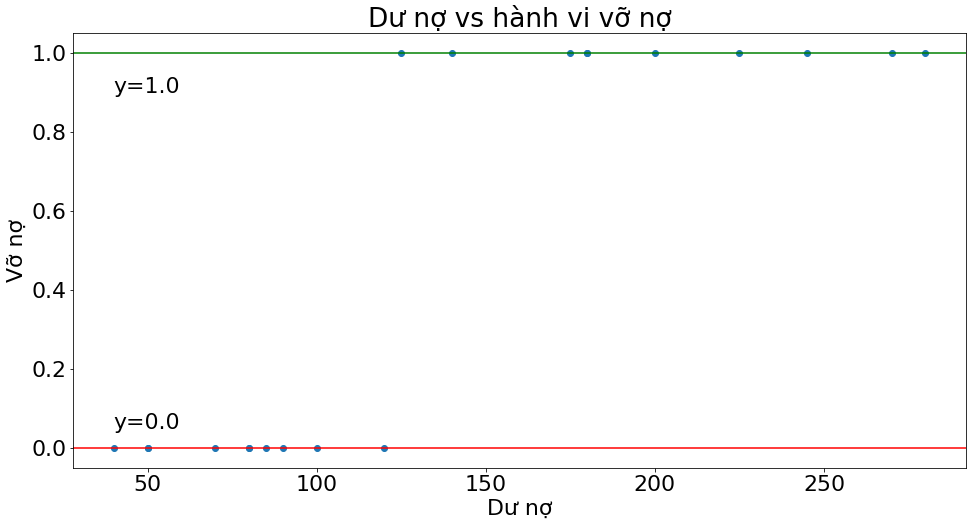

In [1]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams.update({'font.size': 22})

import numpy as np

x1 = np.array([[125, 140, 175, 180, 180, 200, 225, 245, 270, 280, 120, 100, 90, 85, 80, 80, 70, 50, 50, 40]])
x2 = np.array([[15, 18, 20, 25, 25, 25, 27, 30, 32, 35, 45, 50, 50, 55, 55, 55, 60, 70, 80, 90]])
y = np.array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

def _plot(x, y, title="", xlabel="", ylabel=""):
  plt.figure(figsize = (16, 8))
  plt.scatter(x, y, marker = 'o')
  x_min = np.min(x)
  plt.axhline(1, color="green")
  plt.text(x_min, 0.9, "y=1.0")
  plt.axhline(0, color="red")
  plt.text(x_min, 0.05, "y=0.0")
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.title(title)
  plt.show()

_plot(x1, y, 
      title="Dư nợ vs hành vi vỡ nợ",
      xlabel="Dư nợ",
      ylabel="Vỡ nợ")

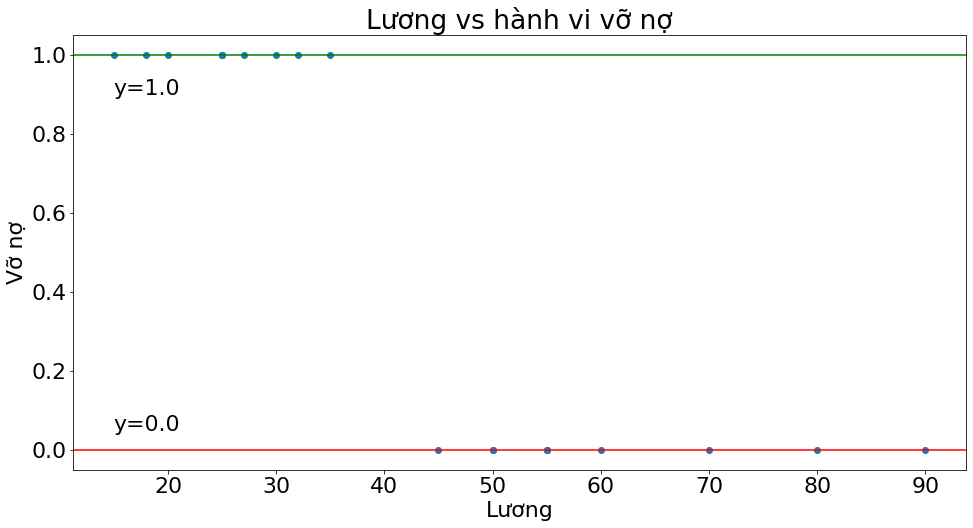

In [2]:
_plot(x2, y, 
      title="Lương vs hành vi vỡ nợ",
      xlabel="Lương",
      ylabel="Vỡ nợ")

Như vậy ta có thể thấy khi lương càng thấp thì khả năng vỡ nợ càng cao và khi dư nợ càng cao thì khả năng vỡ nợ càng cao. Tiếp theo chúng ta xây dựng mô hình hồi qui tuyến tính và dự báo để kiểm chứng miền biến của giá trị dự báo $\hat{y}$.

In [3]:
from sklearn import linear_model

regr = linear_model.LinearRegression(fit_intercept=True) # fit_intercept = False for calculating the bias

X = np.concatenate([x1, x2], axis = 0).T
regr.fit(X, y)

LinearRegression()

Dự báo giá trị của $y$ và biểu đồ hoá giá trị dự báo

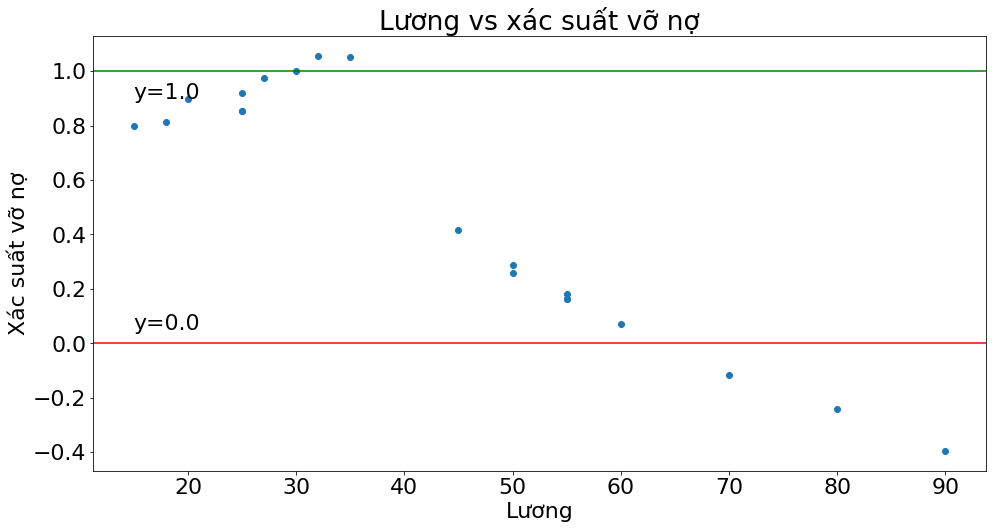

In [4]:
# Dự báo giá nhà ngay trên tập train
ypred = regr.predict(X)

# Đồ thị hoá 
_plot(x2, ypred, 
      title="Lương vs xác suất vỡ nợ",
      xlabel="Lương",
      ylabel="Xác suất vỡ nợ")

Như vậy có một số giá trị đã vượt ngoài khoảng xác suất là $[0, 1]$ như đồ thị ở hình trên. Điều đó chứng tỏ hồi qui tuyến tính không phù hợp để dự báo xác suất.

Ngoài ra mô hình hồi qui tuyến tính quá đơn giản để phân chia tốt các nhóm dữ liệu và đồng thời hồi qui tuyến tính cũng rất nhạy cảm với các điểm dữ liệu outliers là những nguyên nhân khác khiến cho nó dường như là không được sử dụng nhiều cho mục đích phân loại (mặc dù trên thực tế chúng vẫn có khả năng phân loại).

```{toctree}
:hidden:
:titlesonly:


classification.md
```